# 객체 검출

In [1]:
import cv2
import numpy as np
import sys

### 템플릿 메칭

In [2]:
image = cv2.imread('./data/circuit.bmp', cv2.IMREAD_COLOR)
template = cv2.imread('./data/crystal.bmp', cv2.IMREAD_COLOR)

if image is None or template is None:
    print("Image load failed!")
    sys.exit()
    
#image = image + (50, 50 , 50)

noise = np.zeros(image.shape, image.dtype)
cv2.randn(noise, 0, 10)
image = cv2.add(image, noise, dtype=cv2.CV_8UC3)

res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
res_norm = cv2.normalize(res, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

_, maxv, _, maxLoc= cv2.minMaxLoc(res)
print(maxv, maxLoc)

th, tw =template.shape[:2]

cv2.rectangle(image, maxLoc, (maxLoc[0]+tw, maxLoc[1]+th), (0, 0, 255), 2)

cv2.imshow("image", image)
cv2.imshow("template", template)
cv2.imshow("res_norm", res_norm)
cv2.waitKey()
cv2.destroyAllWindows()

0.9984478950500488 (558, 323)


### Workshop (alphabet.bmp)

In [3]:
image = cv2.imread("./data/alphabet.bmp")
template = cv2.imread("./data/S.bmp")

res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
#res = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)
#res = cv2.matchTemplate(image, template, cv2.TM_SQDIFF_NORMED)

res_norm = cv2.normalize(res, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

_, maxv, _, maxLoc= cv2.minMaxLoc(res)
print(maxv, maxLoc)

th, tw =template.shape[:2]

cv2.rectangle(image, maxLoc, (maxLoc[0]+tw, maxLoc[1]+th), (0, 0, 255), 2)

cv2.imshow("image", image)
cv2.imshow("template", template)
cv2.imshow("res_norm", res_norm)
cv2.waitKey()
cv2.destroyAllWindows()

1.0 (280, 146)


### 캐스케이드 분류기와 얼굴 검출

haar cascade classifier
: https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

parameters of detector
: https://stackoverflow.com/questions/20801015/recommended-values-for-opencv-detectmultiscale-parameters

#### 얼굴 검출

In [4]:
image = cv2.imread('./data/lena.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# haarcascade_frontalface_default.xml 파일 위치 찾기
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
image = cv2.imread('./data/kids2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# haarcascade_frontalface_default.xml 파일 위치 찾기
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

#### 눈 검출

In [6]:
image = cv2.imread('./data/kids2.png')
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

if face_cascade.empty() or eye_cascade.empty():
    print("XML load failed")
    sys.exit()

faces = face_cascade.detectMultiScale(image)



for (x1, y1, w1, h1) in faces:
    cv2.rectangle(image, (x1, y1), (x1+w1, y1+h1), (0, 0, 255), 2)
    face = image[y1: y1+ h1, x1:x1+w1]
    eyes = eye_cascade.detectMultiScale(face)

    for (x2, y2, w2, h2) in eyes:
        center = int(x2 + w2/2), int(y2 + h2/2)
        cv2.circle(face, center, int(w2/2), (255, 0, 0), 2, cv2.LINE_AA)
    
    
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()


#### 가족사진

In [7]:
image = cv2.imread('./data/family2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

if face_cascade.empty() or eye_cascade.empty():
    print("XML load failed")
    sys.exit()

faces = face_cascade.detectMultiScale(gray, 1.05, minSize=(100, 100))



for (x1, y1, w1, h1) in faces:
    cv2.rectangle(image, (x1, y1), (x1+w1, y1+h1), (0, 0, 255), 2)
    face = gray[y1: y1+ h1, x1:x1+w1]
    eyes = eye_cascade.detectMultiScale(face, 1.009, 6, maxSize=(30, 30))

    for (x2, y2, w2, h2) in eyes:
        center = x1 + int(x2 + w2/2), y1 + int(y2 + h2/2)
        cv2.circle(image, center, int(w2/2), (255, 0, 0), 2, cv2.LINE_AA)
    
    
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()


### multi_faces.jpg

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

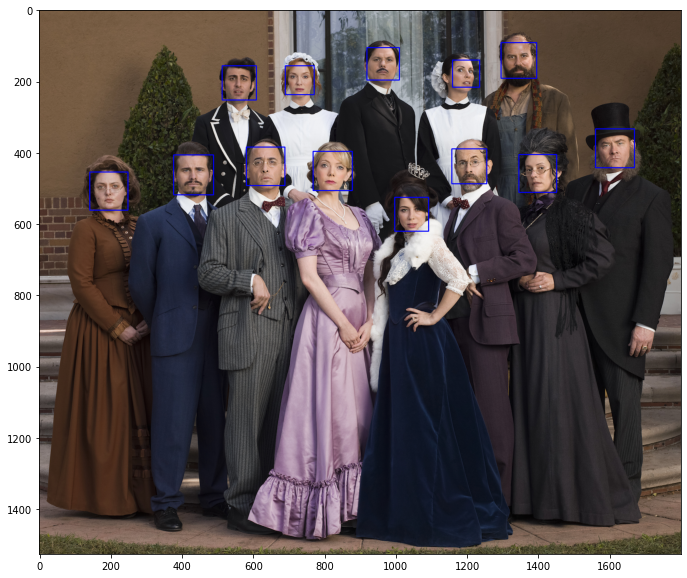

In [9]:
image = mpimg.imread('./data/multi_faces.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

if face_cascade.empty() or eye_cascade.empty():
    print("XML load failed")
    sys.exit()
    
#faces = face_cascade.detectMultiScale(gray, minSize=(100, 100), maxSize=(130, 130))
faces = face_cascade.detectMultiScale(gray, 1.3, 8)

for (x1, y1, w1, h1) in faces:
    cv2.rectangle(image, (x1, y1), (x1+w1, y1+h1), (0, 0, 255), 2)
    face = gray[y1: y1+ h1, x1:x1+w1]

plt.figure(figsize=(20, 10))
plt.imshow(image)

### Workshop : Camera Device로부터 얻은 frame에 대해서 얼굴(눈) 검출하기

In [10]:
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

if face_cascade.empty() or eye_cascade.empty():
    print("XML load failed")
    sys.exit()
        
cap = cv2.VideoCapture(1) # 카메라 디바이스, 동영상 파일명, 스트리밍 주소

if not cap.isOpened():
    print("Camera open failed!!")
    sys.exit()


w, h = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print("frame width, height:", w, h)

while True:
    ret, frame = cap.read()
    
    if not ret or frame is None:
        print("Image Load failed")
        sys.exit()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 6)
        
    for (x1, y1, w1, h1) in faces:
        cv2.rectangle(frame, (x1, y1), (x1+w1, y1+h1), (0, 0, 255), 2)
        face = gray[y1: y1+ h1, x1:x1+w1]
        
        eyes = eye_cascade.detectMultiScale(face, 1.1, 12)

        for (x2, y2, w2, h2) in eyes:
            center = x1 + int(x2 + w2/2), y1 + int(y2 + h2/2)
            cv2.circle(frame, center, int(w2/2), (255, 0, 0), 2, cv2.LINE_AA)
        
        
    cv2.imshow("frame", frame)

    
    if cv2.waitKey(10) == 27: #sleep 효과
        break

if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

frame width, height: 640 480


### Workshop : Blurring을 이용하여 얼굴만 가리기

In [11]:
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')

if face_cascade.empty() or eye_cascade.empty():
    print("XML load failed")
    sys.exit()
        
cap = cv2.VideoCapture(1) # 카메라 디바이스, 동영상 파일명, 스트리밍 주소

if not cap.isOpened():
    print("Camera open failed!!")
    sys.exit()


w, h = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print("frame width, height:", w, h)

while True:
    ret, frame = cap.read()
    
    if not ret or frame is None:
        print("Image Load failed")
        sys.exit()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 6)
        
    for (x1, y1, w1, h1) in faces:
        cv2.rectangle(frame, (x1, y1), (x1+w1, y1+h1), (0, 0, 255), 2)
       
        # 검출된 face에 대해 blurring
        frame[y1:y1+h1,x1:x1+w1] = cv2.blur(frame[y1:y1+h1,x1:x1+w1], (100,100))
        
    cv2.imshow("frame", frame)

    
    if cv2.waitKey(10) == 27: #sleep 효과
        break

if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

frame width, height: 640 480


### HOG 알고리즘과 보행자 검출

In [12]:
src = cv2.imread('./data/people1.png')

hog = cv2.HOGDescriptor()
hog_descriptor = hog.compute(src)

In [13]:
src = cv2.imread('./data/people1.png')

win_size = (src.shape[1], src.shape[0])
block_size = (16, 16)
block_stride = (8, 8)
cell_size = (8, 8)
nbins = 9

hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
hog_descriptor = hog.compute(src)

In [14]:
cap = cv2.VideoCapture('./data/vtest.avi') # 카메라 디바이스, 동영상 파일명, 스트리밍 주소

if not cap.isOpened():
    print("Camera open failed!!")
    sys.exit()


w, h = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print("frame width, height:", w, h)

hog = cv2.HOGDescriptor()

hog.setSVMDetector(hog.getDefaultPeopleDetector()) # 보행자 검출을 위해 훈련된 분류기 계수


while True:
    ret, frame = cap.read()

    if not ret or frame is None:
        print("Image Load failed")
        sys.exit()

    detected, ret = hog.detectMultiScale(frame)
    for (x, y, w, h) in detected:
        b = np.random.randint(0, 255)
        g = np.random.randint(0, 255)
        r = np.random.randint(0, 255)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (b, g, r), 3)


    cv2.imshow("frame", frame)


    if cv2.waitKey(10) == 27: #sleep 효과
        break

if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

frame width, height: 768 576


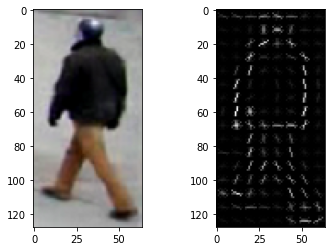

In [15]:
from skimage.feature import hog

src = cv2.imread('./data/people1.png')

hog_features, hog_image = hog(src, orientations=9, pixels_per_cell=(8,8),
                            cells_per_block = (2, 2),
                            block_norm = 'L2-Hys',
                            transform_sqrt = False,
                            visualize=True, feature_vector=False)

fig = plt.figure()
plt.subplot(121)
plt.imshow(src)

plt.subplot(122)
plt.imshow(hog_image, cmap='gray')

In [16]:
hog_features.shape

(15, 7, 2, 2, 9)